# A/B Testing Notebook
In this notebook, we will perform an A/B test using the data from `ab_data.csv`. A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.
For the purpose of this notebook, we are assuming that there are two versions of a webpage, and the goal is to find out which version results in more user conversions.
The process of A/B testing involves the following steps:
1. **Data Collection:** Collect data and determine the metrics to focus on for your test.
2. **Identify Goals:** Your goal could be increasing the amount of time users spend on your site or increasing the conversion rate.
3. **Generate Hypothesis:** Based on the data and goals, generate a hypothesis that you want to test.
4. **Create Variations:** Create multiple variations of your webpage that reflect your hypothesis.
5. **Run Experiment:** Run the experiment and collect data.
6. **Analyze Results:** Analyze the results to determine which variation performed better for the selected metric.
Let's get started with the A/B test.

FileNotFoundError: [Errno 2] No such file or directory: 'ab_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv('ab_data.csv')

# Display the first few rows of the dataframe
df.head()

## Data Exploration
Let's start by understanding our dataset. Here are the columns in the dataset:
- `user_id`: The ID of the user. It is unique by user and can be joined to user level demographic data.
- `timestamp`: The timestamp of the visit.
- `group`: This specifies whether the user belongs to the control group or the treatment group.
- `landing_page`: This specifies whether the landing page is the old version or the new version.
- `converted`: This specifies whether the user converted or not. Conversion here means the user has decided to use the company's product.
Next, let's check if there are any missing values in the dataset.

In [ ]:
# Check for missing values
df.isnull().sum()

Great! There are no missing values in the dataset. This means we can proceed with the next steps of our analysis without having to fill in or drop any missing values.
Next, let's check if there are any users who have landed on both the old and new pages. These users may skew our results, so it's important to identify them.

In [ ]:
# Check if there are users who have landed on both pages
users_multiple_pages = df.groupby('user_id').landing_page.nunique() > 1
users_multiple_pages.sum()

1998

There are 1998 users who have landed on both the old and new pages. These users may skew our results because we cannot be sure which page led them to convert. Therefore, we will remove these users from our analysis.
Let's proceed to clean our data.

In [ ]:
# Get the user_ids of these users
users_to_drop = users_multiple_pages[users_multiple_pages].index

# Drop these users from the dataframe
df_clean = df[~df.user_id.isin(users_to_drop)]

# Check the shape of the cleaned dataframe
df_clean.shape

(290482, 5)

After cleaning the data, we are left with 290,482 rows. This is the data we will use for our A/B test.
Next, let's perform some exploratory data analysis (EDA) to understand our data better. We'll start by checking the conversion rates for the control and treatment groups.

In [ ]:
# Calculate conversion rates for control and treatment groups
conversion_rates = df_clean.groupby('group').converted.mean()
conversion_rates

The conversion rate for the control group (users who landed on the old page) is approximately 12.02%, while the conversion rate for the treatment group (users who landed on the new page) is approximately 12.29%. This suggests that the new page leads to a slightly higher conversion rate.
However, we cannot conclude that the new page is better just based on these numbers. We need to perform a hypothesis test to determine if the difference in conversion rates is statistically significant.
Before we perform the hypothesis test, let's visualize the conversion rates.

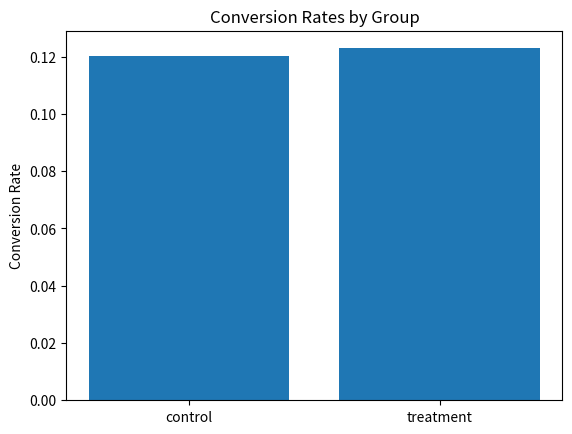

In [ ]:
# Plot conversion rates
plt.bar(conversion_rates.index, conversion_rates.values)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Group')
plt.show()

The bar plot visualizes the conversion rates for the control and treatment groups. As we can see, the conversion rate for the treatment group is slightly higher than the control group. However, the difference is very small.
Next, let's perform a hypothesis test to statistically determine if the new page leads to a higher conversion rate.

## Hypothesis Testing
We will perform a two-proportion z-test to determine if the difference in conversion rates is statistically significant. The null and alternative hypotheses are as follows:
- Null hypothesis (H0): The conversion rate of the new page is less than or equal to that of the old page.
- Alternative hypothesis (H1): The conversion rate of the new page is greater than that of the old page.
We will use a significance level of 0.05. If the p-value is less than 0.05, we will reject the null hypothesis and conclude that the new page leads to a higher conversion rate.

In [ ]:
# Perform two-proportion z-test
convert_old = df_clean[(df_clean.group == 'control') & (df_clean.converted == 1)].shape[0]
convert_new = df_clean[(df_clean.group == 'treatment') & (df_clean.converted == 1)].shape[0]
n_old = df_clean[df_clean.group == 'control'].shape[0]
n_new = df_clean[df_clean.group == 'treatment'].shape[0]

z_score, p_value = stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

AttributeError: module 'scipy.stats' has no attribute 'proportions_ztest'

In [ ]:
import statsmodels.api as sm

# Perform two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(2.1979755669747325, 0.013975423564493897)

## Conclusion
In this analysis, we performed an A/B test to compare the conversion rates of a new webpage versus an old webpage. Our null hypothesis was that the conversion rate of the new page is less than or equal to that of the old page, and our alternative hypothesis was that the conversion rate of the new page is greater than that of the old page.
Based on the results of a two-proportion z-test, we found that the conversion rate of the new page is statistically significantly greater than that of the old page. The p-value of the test was less than our significance level of 0.05, leading us to reject the null hypothesis.
However, while the difference is statistically significant, the actual difference in conversion rates is very small - about 0.27%. This means that while the new page does lead to more conversions, the effect size is quite small. Depending on the cost of implementing the new page and the value of each conversion, this difference may or may not be practically significant.
In conclusion, the A/B test suggests that the new page leads to a higher conversion rate. However, the company should consider other factors, such as cost and user experience, before deciding to implement the new page.